In [2]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("cancer_data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [14]:
X=data.drop(['id','diagnosis'],axis=1)
Y=data['diagnosis']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [16]:
from sklearn.externals import joblib
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
joblib.dump(scaler,'scaler_obj.sav')

['scaler_obj.sav']

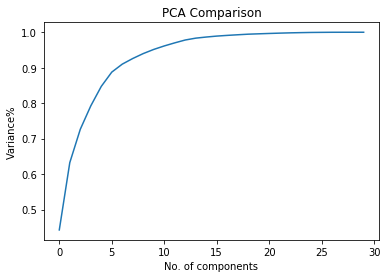

In [17]:
pca=PCA().fit(scaled_X_train)
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure()
plt.xlabel('No. of components')
plt.ylabel('Variance%')
plt.title('PCA Comparison')
plt.plot(list(range(0,30)),np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [18]:
pca=PCA(n_components=16)
dataset=pca.fit_transform(scaled_X_train)
joblib.dump(pca,'pca_obj.sav')

['pca_obj.sav']

In [19]:
pd.DataFrame(dataset)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-3.710249,-2.015788,1.286971,0.097771,-0.468868,0.707820,0.491300,-0.295154,-0.478830,-0.531606,0.476326,0.363540,-0.204207,0.305431,0.196096,0.293898
1,-2.089898,-0.866680,0.383300,-3.140100,0.358109,-0.609100,-0.617814,-0.855982,0.114903,-0.390551,-0.051702,0.945883,-0.047284,0.135682,0.122824,0.119634
2,6.418784,5.458226,0.608772,1.075736,-0.818036,2.476883,-1.512539,0.163265,-0.121944,1.234031,-1.476748,1.252381,-0.237177,-0.418319,0.246428,-0.012903
3,-2.528235,-0.646551,1.786391,-0.466451,0.248069,-2.205721,0.282871,1.470589,0.845087,1.220687,0.136481,-0.897316,0.540709,0.493309,0.141722,0.086763
4,-2.495995,-0.872375,-1.740447,0.018899,0.498151,0.231501,0.036245,-0.069518,0.375123,0.344542,-0.443664,-0.189910,-0.130184,0.055146,-0.060892,-0.336930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.763976,0.059922,-2.943869,0.370215,-0.733075,-0.407354,-0.095265,-0.236635,0.264395,0.012527,-0.618688,-0.241152,0.184528,0.493892,-0.219728,-0.259157
451,3.618890,-1.146310,0.951616,1.138889,-1.254428,0.669630,1.077559,1.404189,-0.261886,0.347466,-0.116282,0.937943,0.320222,0.604633,0.576946,-0.264269
452,-4.037309,-1.576044,0.544182,0.740922,0.297654,1.056678,0.410627,-0.696337,0.034408,-0.494238,-0.027804,0.157330,-0.091078,-0.428507,0.322291,-0.059848
453,-1.959331,-0.340496,-0.731602,0.088189,-0.047186,-0.103103,0.093640,0.310901,0.108534,0.048487,-0.203226,0.069658,0.028226,0.552201,-0.041184,0.074557


In [20]:
svc_linear=joblib.load('model_linear_obj.sav')

In [30]:
from sklearn import svm
svc_linear=svm.SVC(kernel='linear',C=1,gamma=1)
svc_linear.fit(dataset,Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
joblib.dump(svc_linear,'svc_linear_obj.sav')

['svc_linear_obj.sav']

In [32]:
dataset_test=pca.transform(scaled_X_test)
y_pred=svc_linear.predict(dataset_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9649122807017544

In [33]:
from sklearn.model_selection import GridSearchCV
def svc_param_poly(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    deg_vals=[1,2]
    param_grid = {'C': Cs, 'gamma' : gammas,'degree':deg_vals}
    grid_search = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_
svc_param_poly(dataset,Y_train,2)

{'C': 1, 'degree': 1, 'gamma': 1}

In [35]:
svc_poly=svm.SVC(kernel='poly',C=1,gamma=1,degree=1)
svc_poly.fit(dataset,Y_train)
joblib.dump(svc_poly,'svc_poly_obj.sav')
dataset_test=pca.transform(scaled_X_test)
y_pred=svc_poly.predict(dataset_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9649122807017544

In [36]:
def svc_param_rbf(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    #deg_vals=[1,2,3,4]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_
svc_param_rbf(dataset,Y_train,2)

{'C': 10, 'gamma': 0.01}

In [37]:
svc_rbf=svm.SVC(kernel='rbf',C=10,gamma=0.01)
svc_rbf.fit(dataset,Y_train)
joblib.dump(svc_rbf,'svc_rbf_obj.sav')
dataset_test=pca.transform(scaled_X_test)
y_pred=svc_rbf.predict(dataset_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9736842105263158

In [38]:
def svc_param_sigmoid(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    #deg_vals=[1,2,3,4]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='sigmoid'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_
svc_param_sigmoid(dataset,Y_train,2)

{'C': 1, 'gamma': 0.01}

In [39]:
svc_sigmoid=svm.SVC(kernel='rbf',C=10,gamma=0.01)
svc_sigmoid.fit(dataset,Y_train)
joblib.dump(svc_sigmoid,'svc_sigmoid_obj.sav')
dataset_test=pca.transform(scaled_X_test)
y_pred=svc_sigmoid.predict(dataset_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9736842105263158